# Sources : 

Kaggle Dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Approach:
1. Load the required libraries
2. Load the provided train and test datasets
3. Exploratory Data Analysis
4. Merge train and test data for data preprocessing
5. Handle categorical and numerical missing values
6. Feature Engineering
7. Feature Transformation
8. Encode categorical features
9. Split train and test data
10. Target feature encoding
11. Build a Baseline model and evaluate it using K Fold cross-validation
12. Bagging Ensemble
13. Submit test data prediction

## Load the required library

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

## Load the provided train and test datasets

In [44]:
#Train data
df_train=pd.read_csv(r'C:\Users\Michael\Desktop\DS\House Prices - Advanced Regression Techniques\train.csv')
df_train.head()
#Test data
df_test=pd.read_csv(r'C:\Users\Michael\Desktop\DS\House Prices - Advanced Regression Techniques\test.csv')
df_test.head()
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

## Exploratory Data Analysis

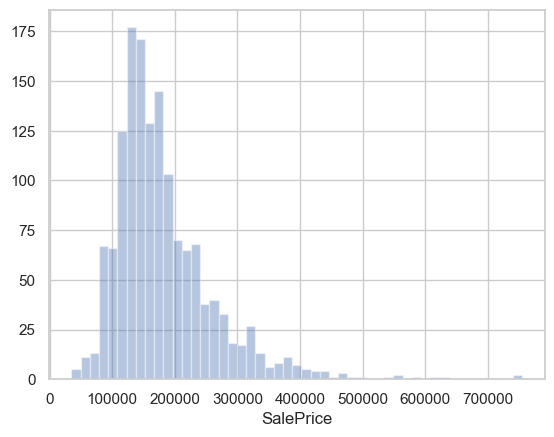

In [45]:
#distribution of values in target feature
sns.distplot(df_train.get("SalePrice"), kde=False)
plt.show()

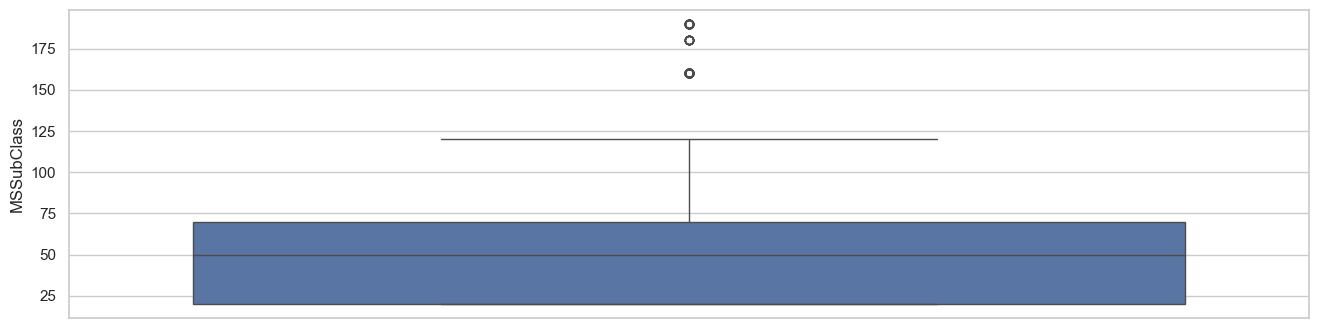

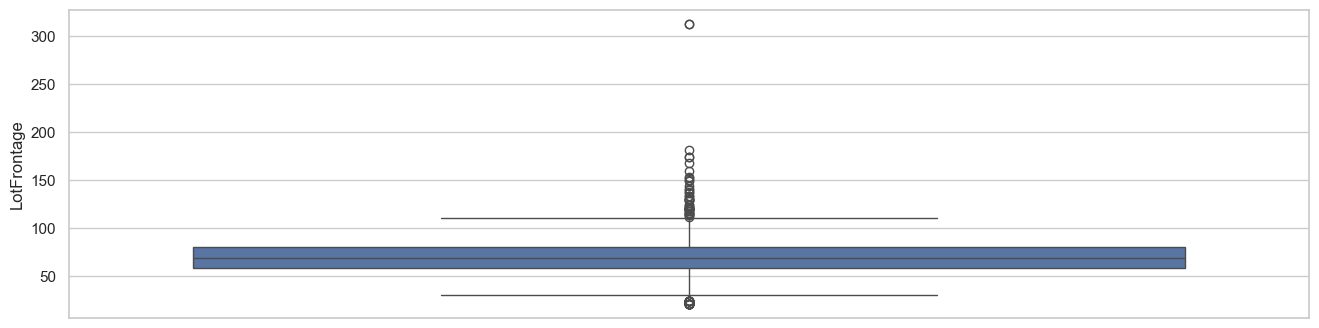

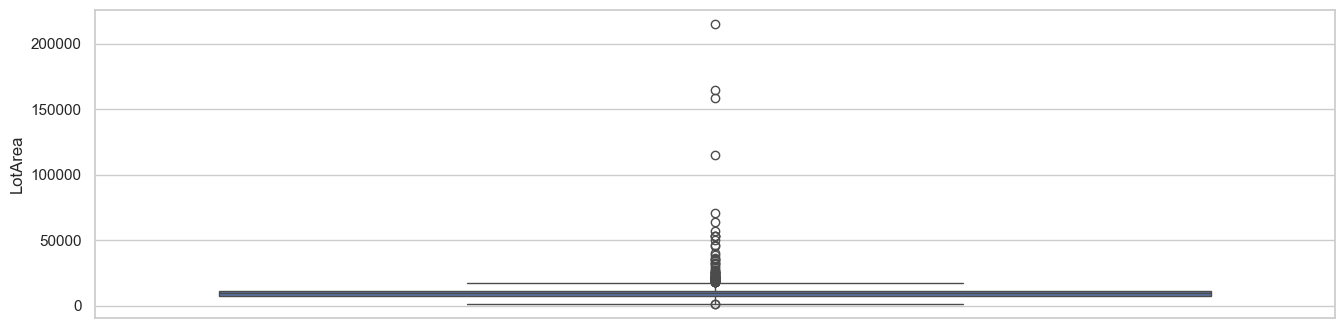

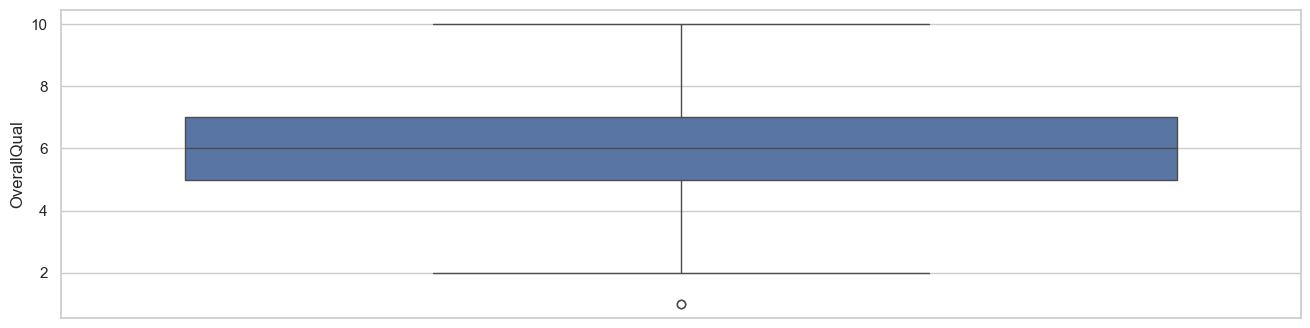

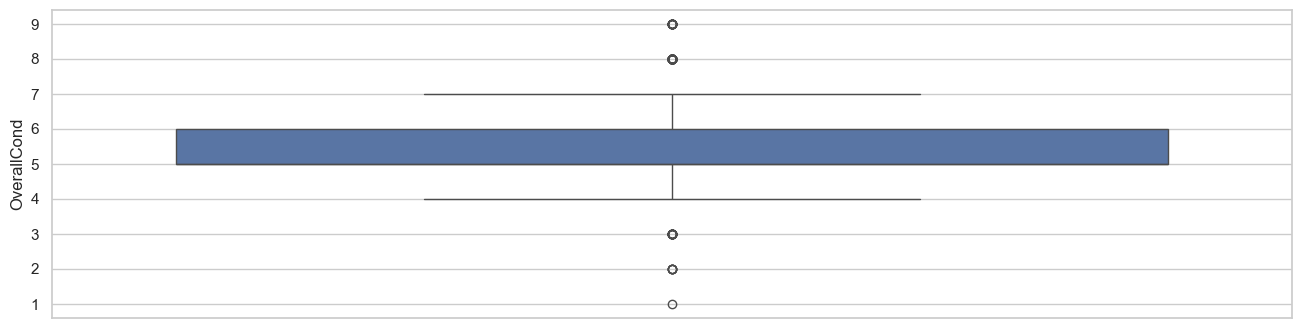

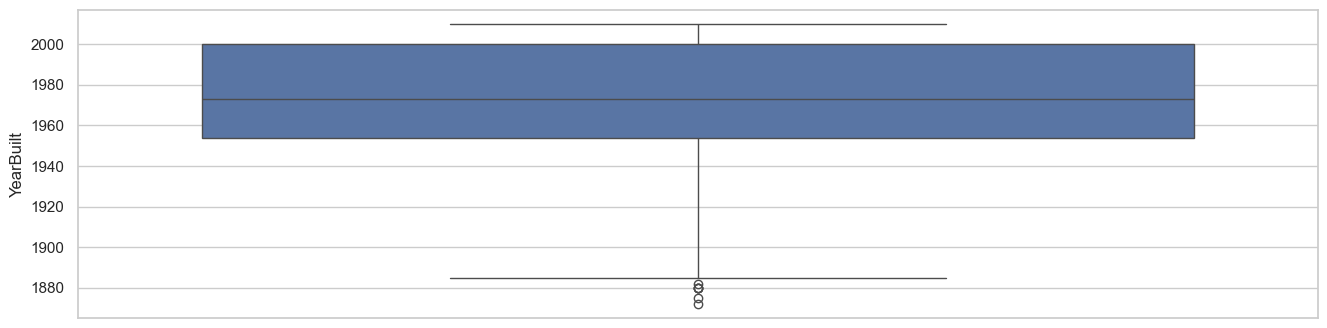

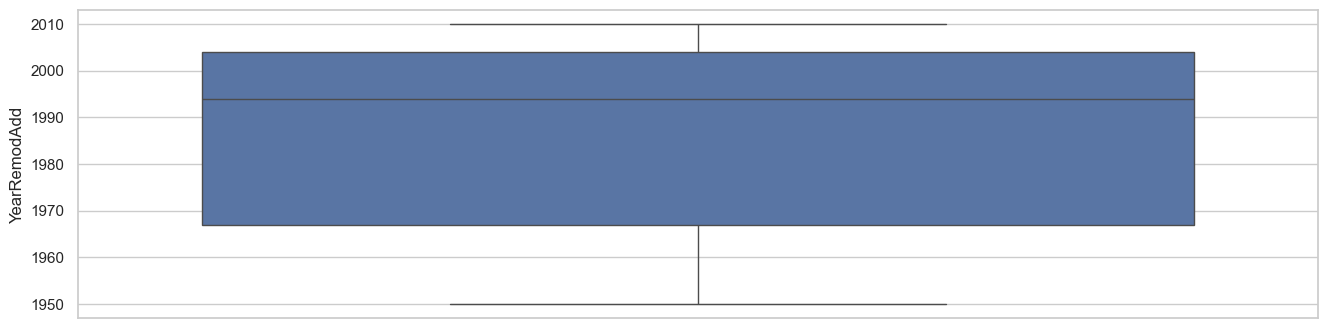

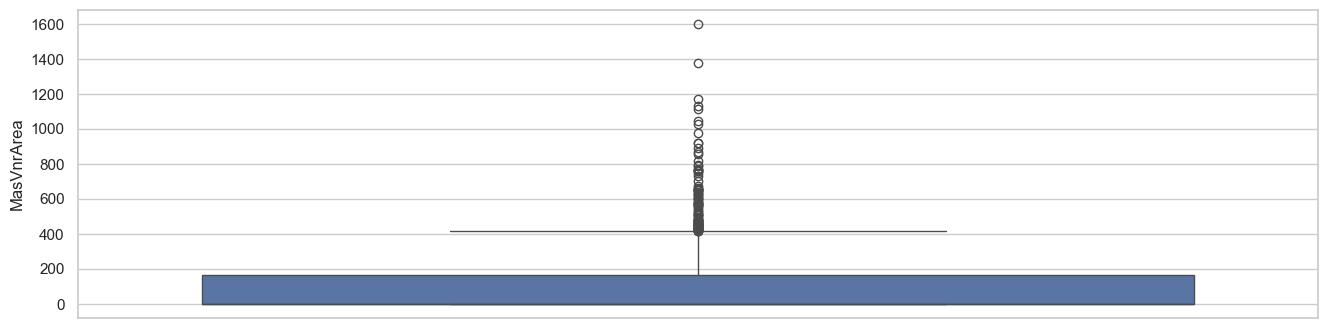

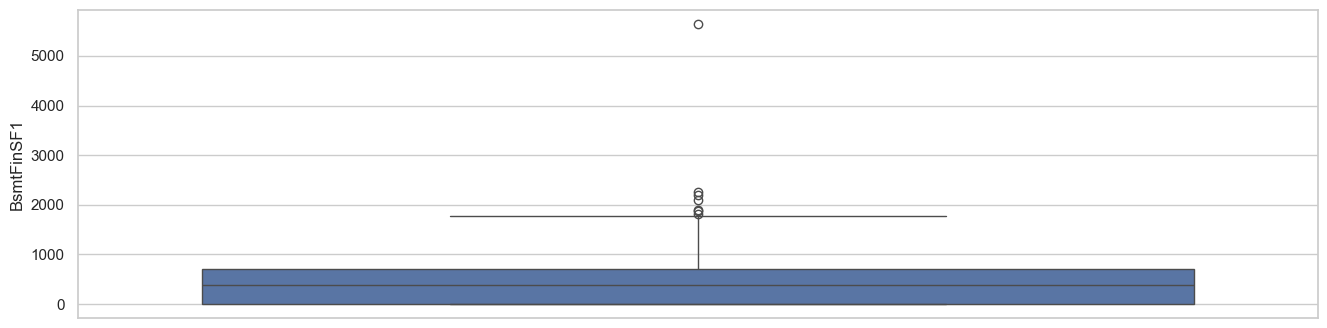

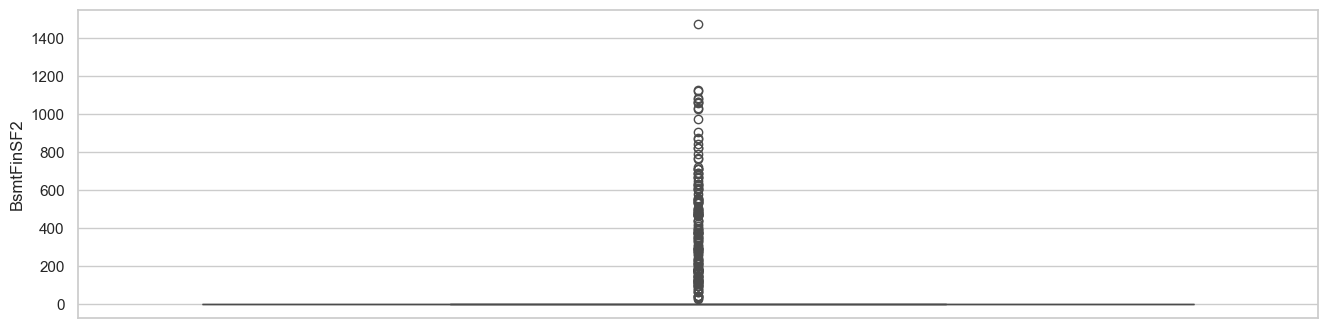

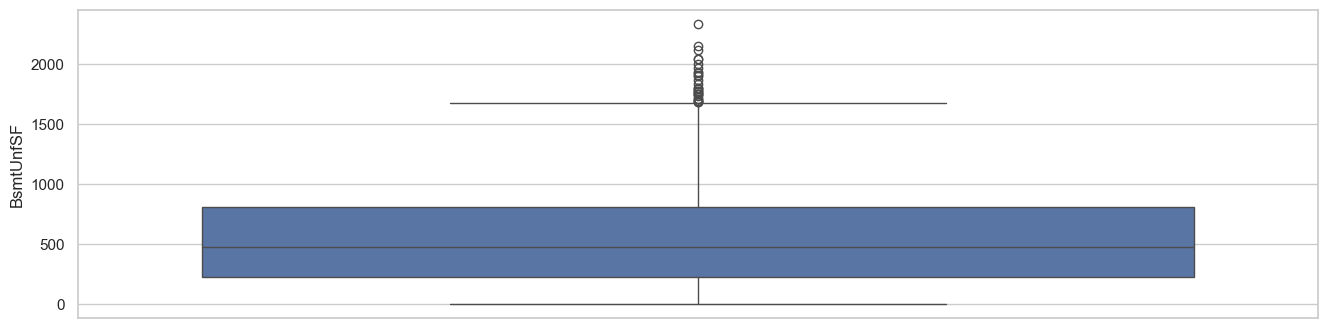

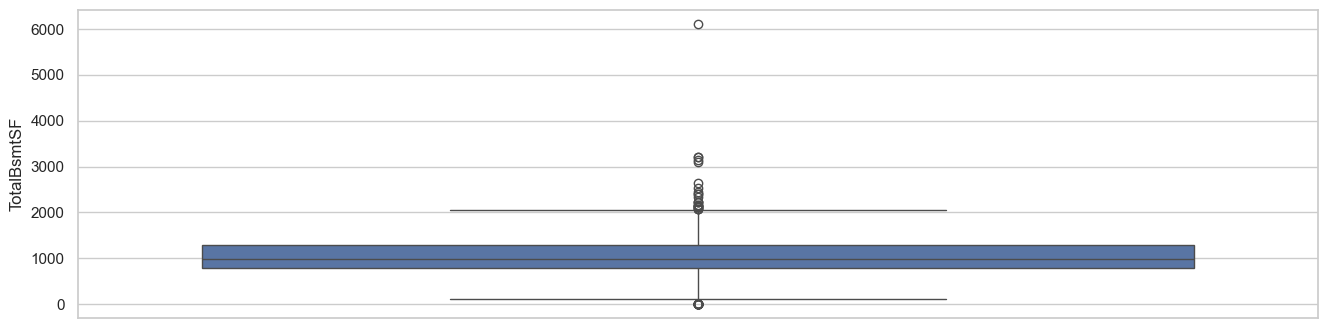

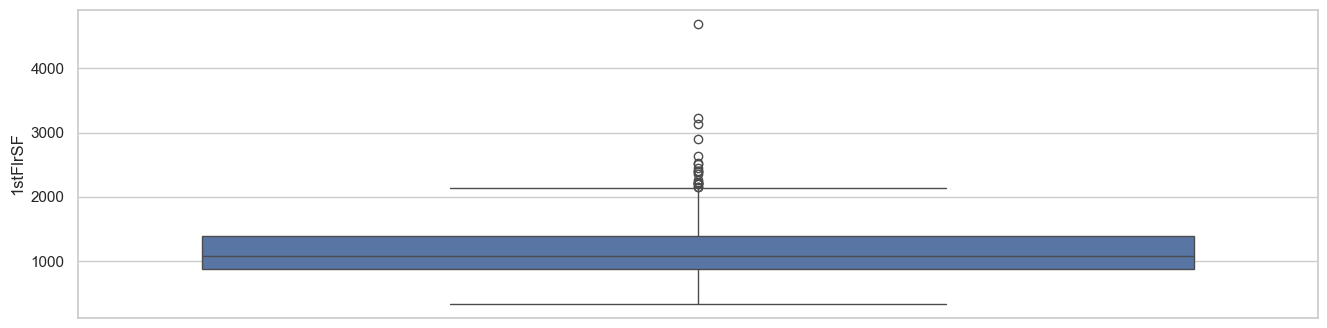

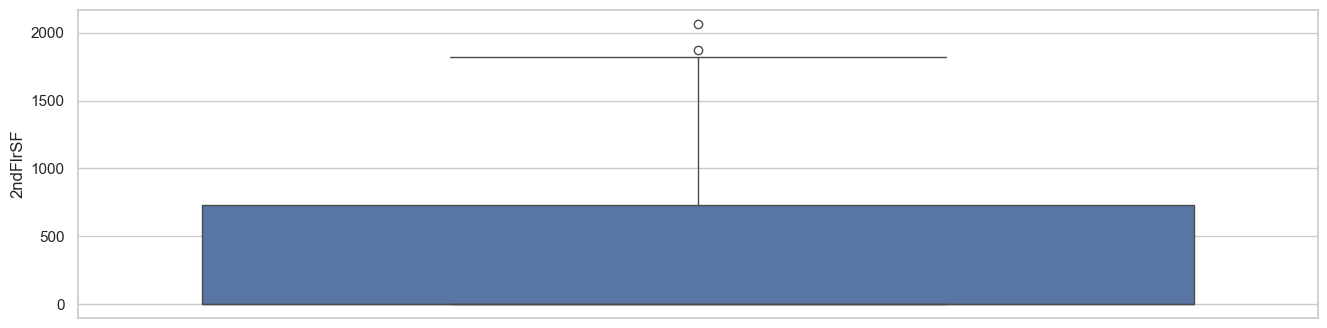

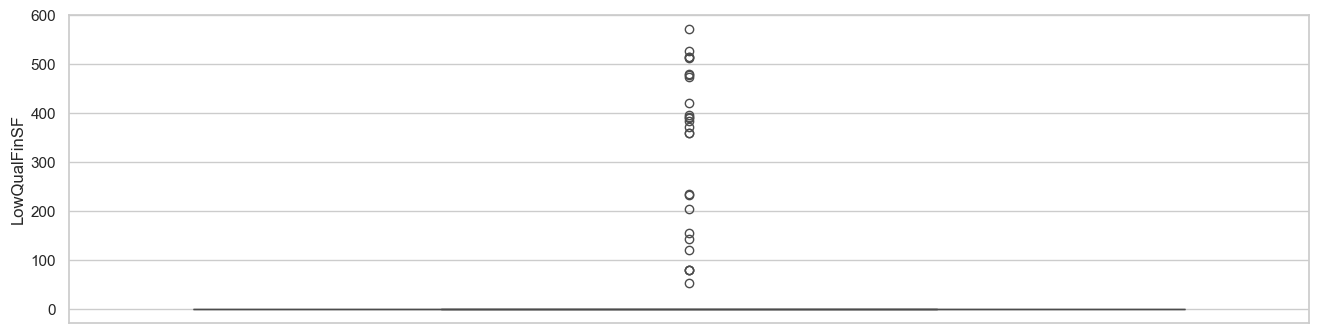

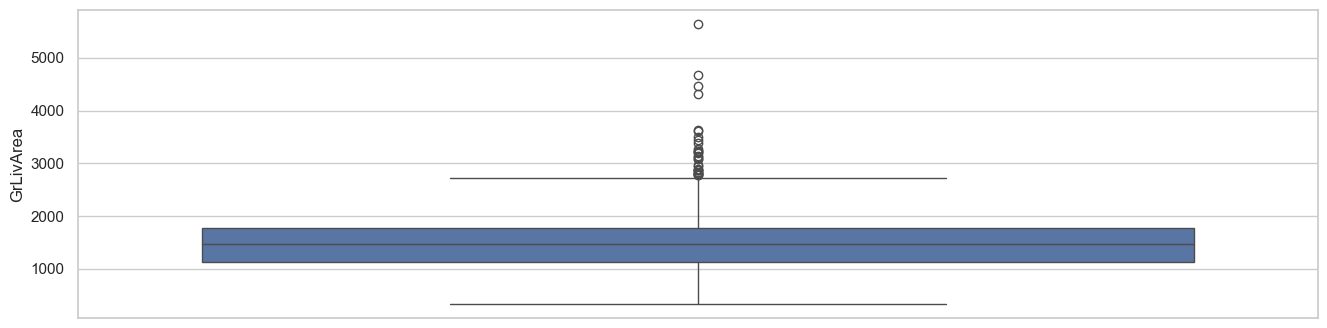

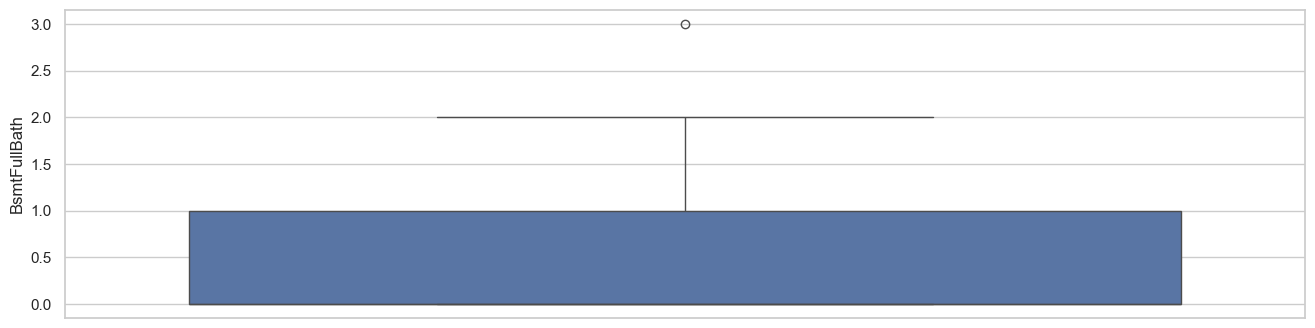

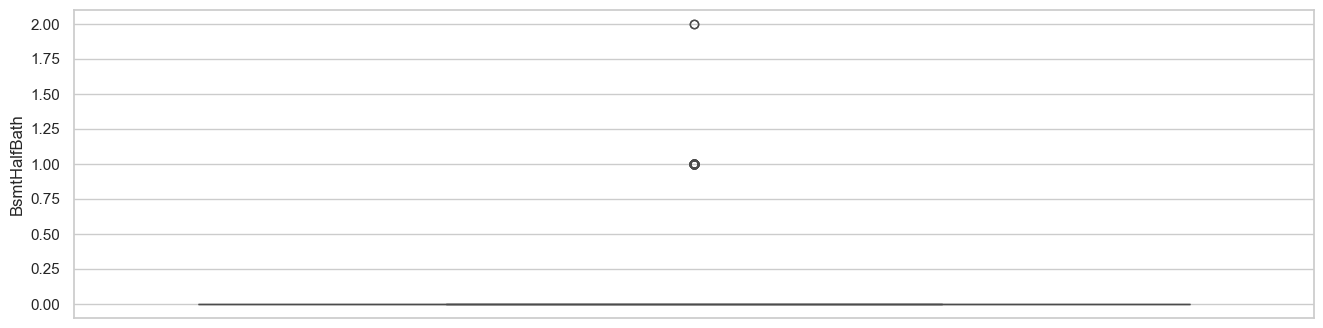

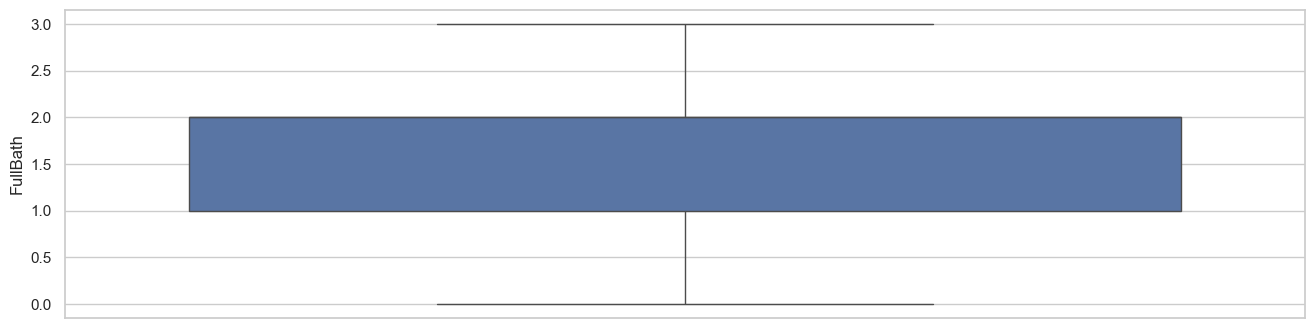

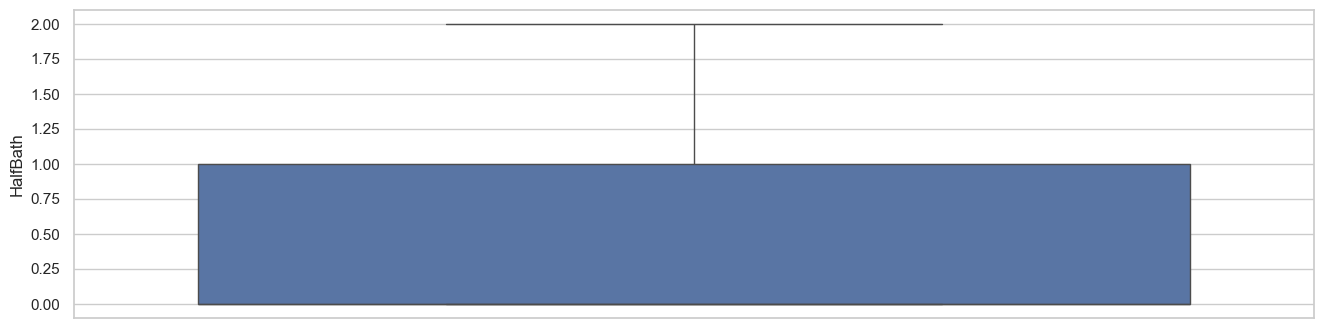

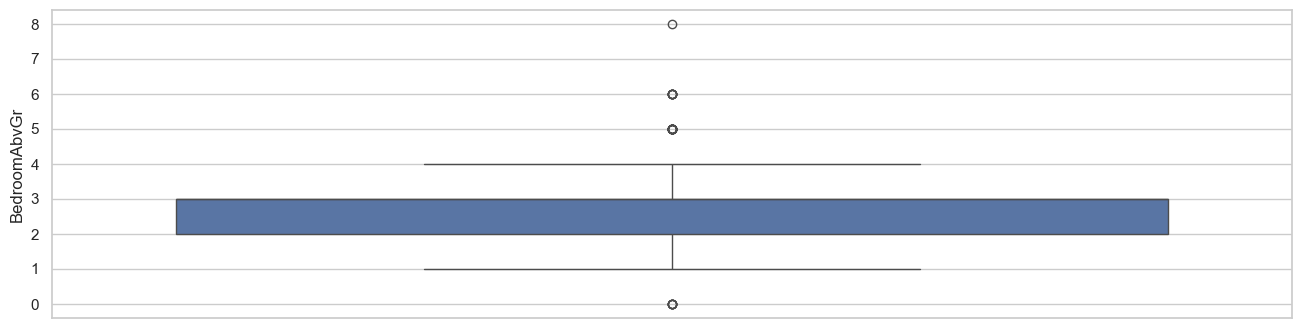

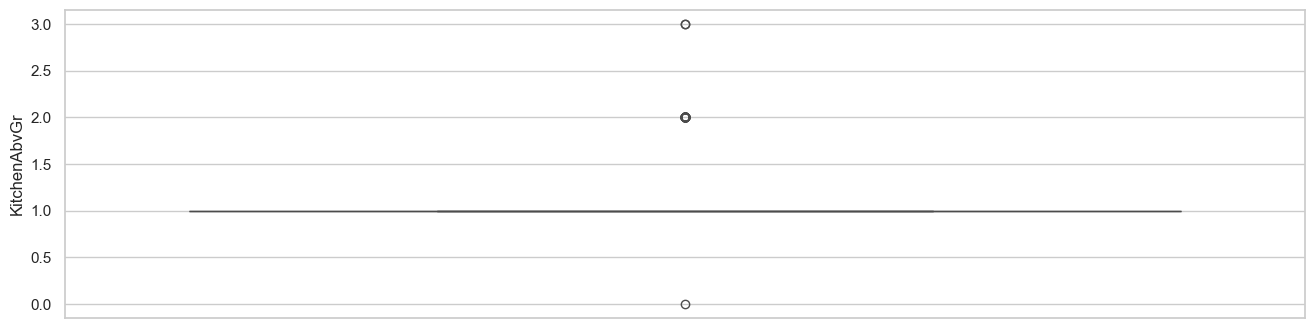

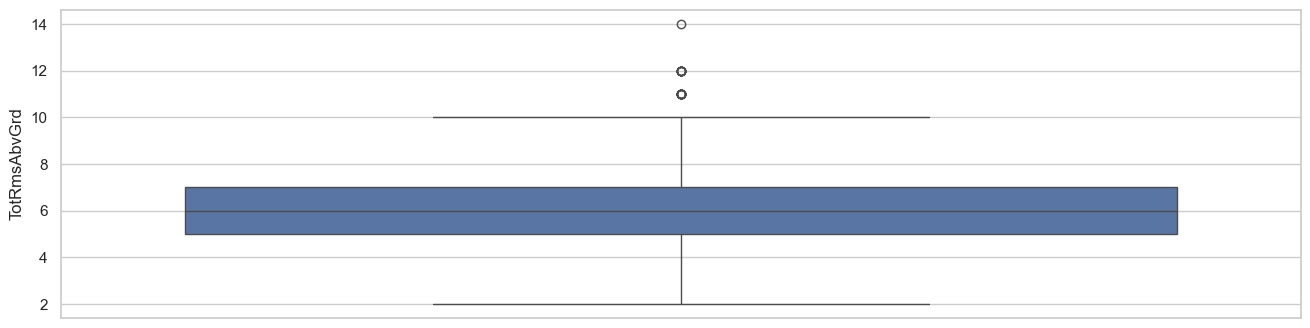

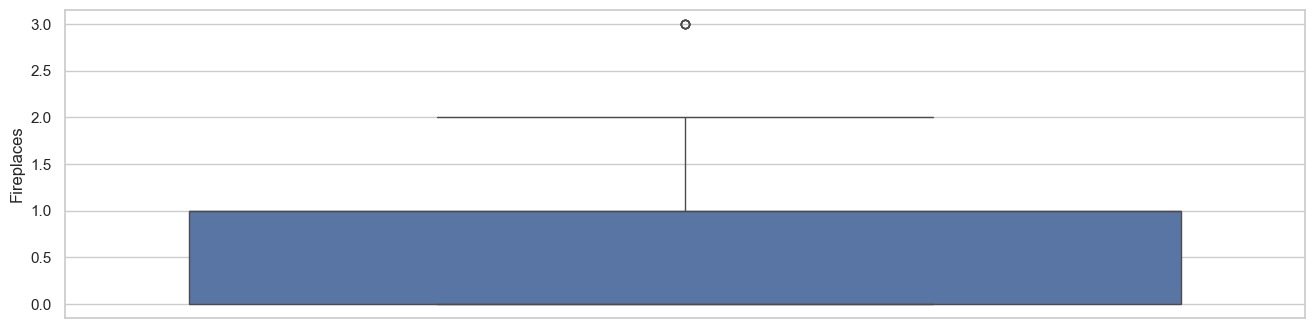

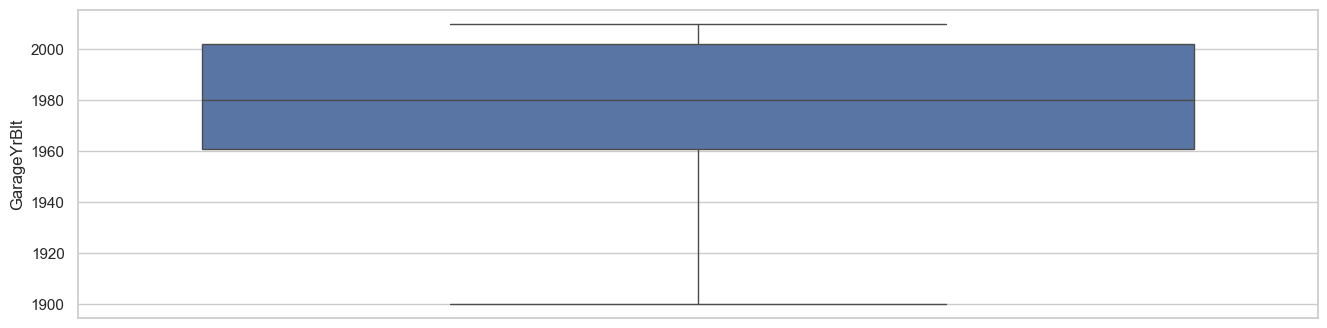

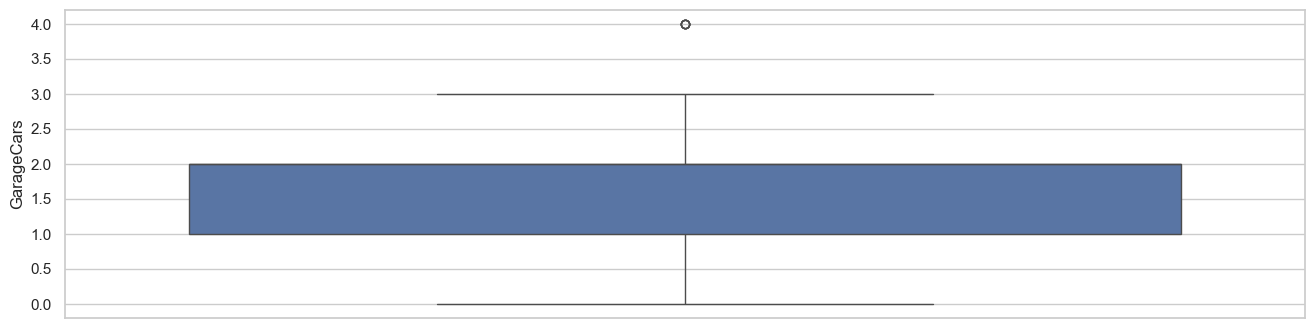

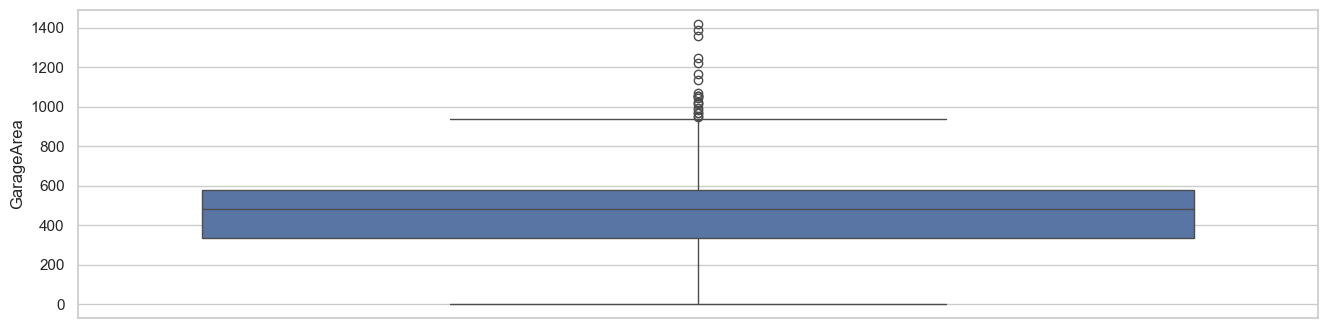

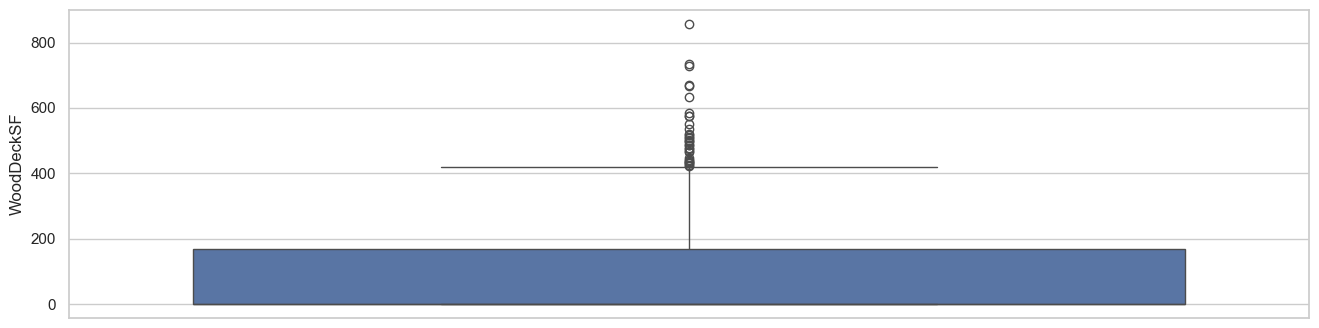

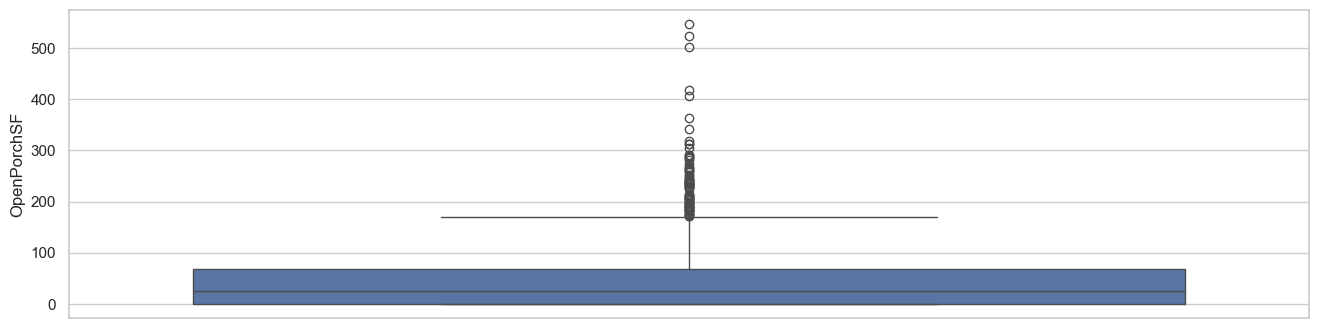

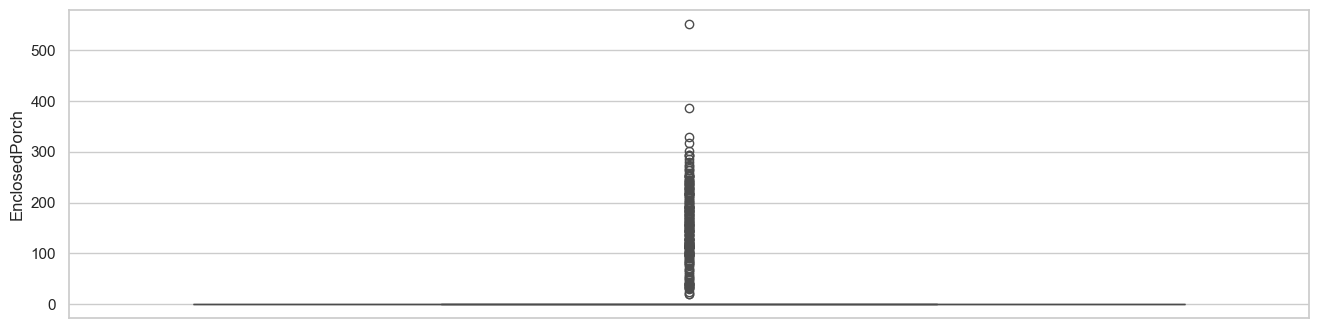

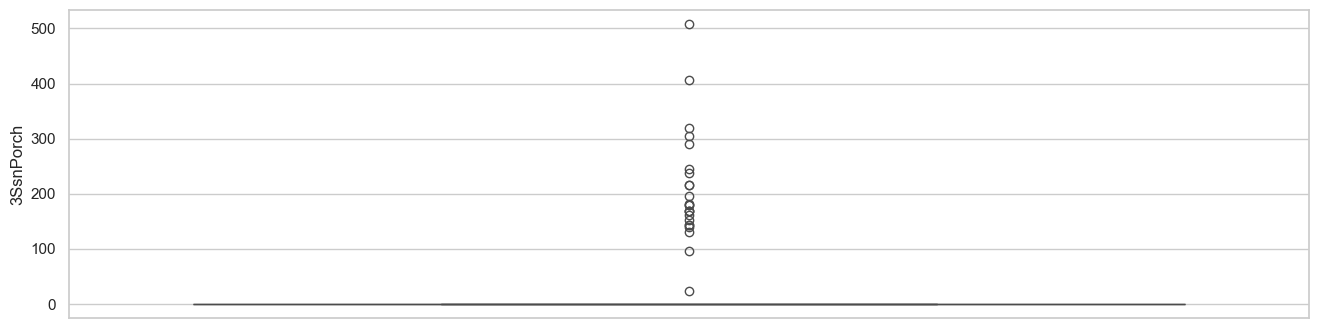

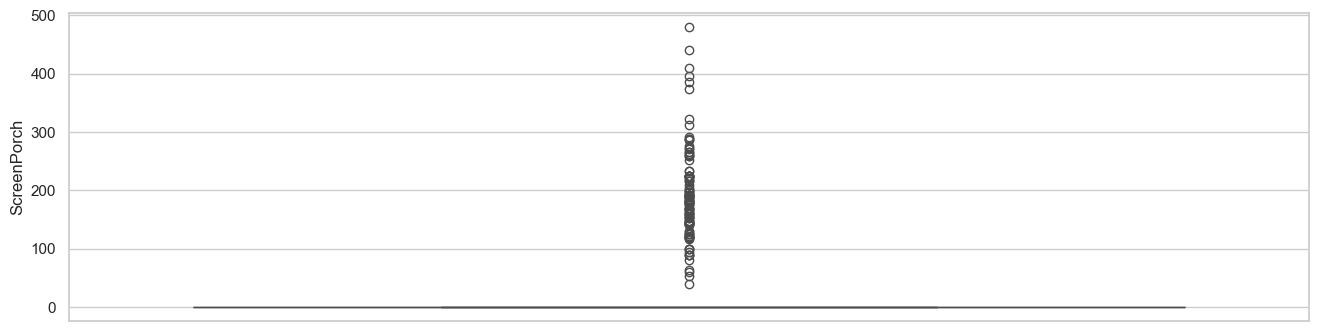

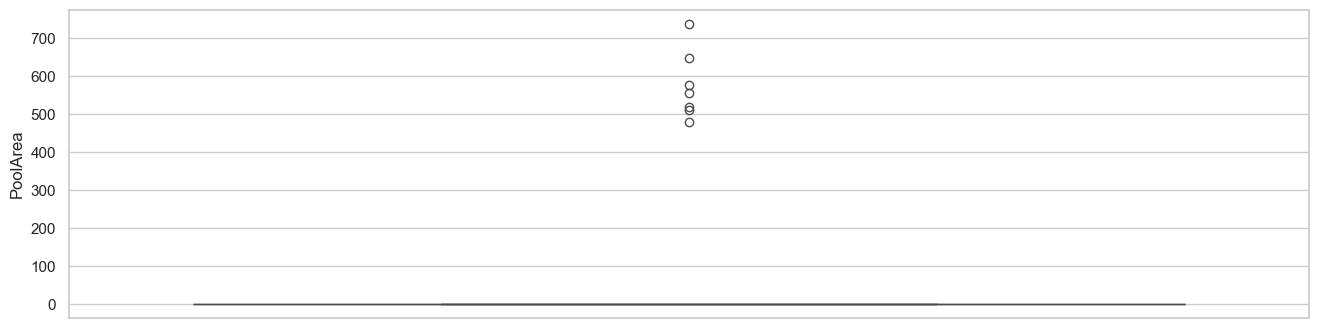

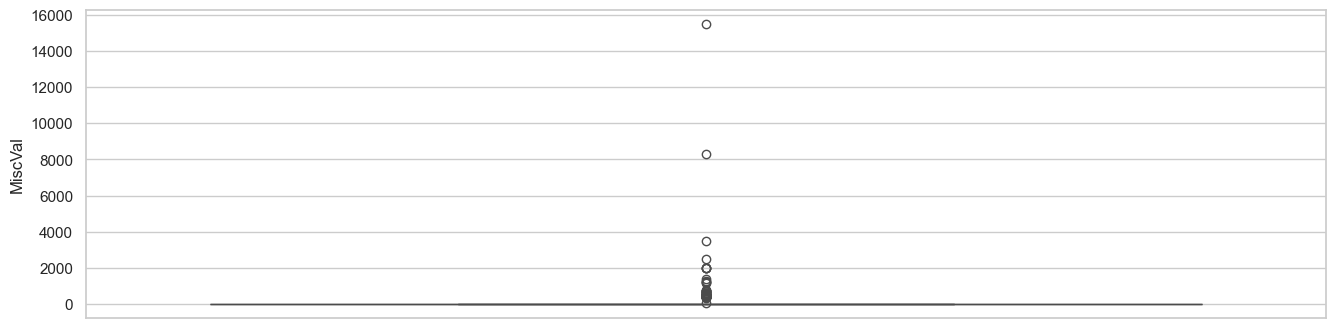

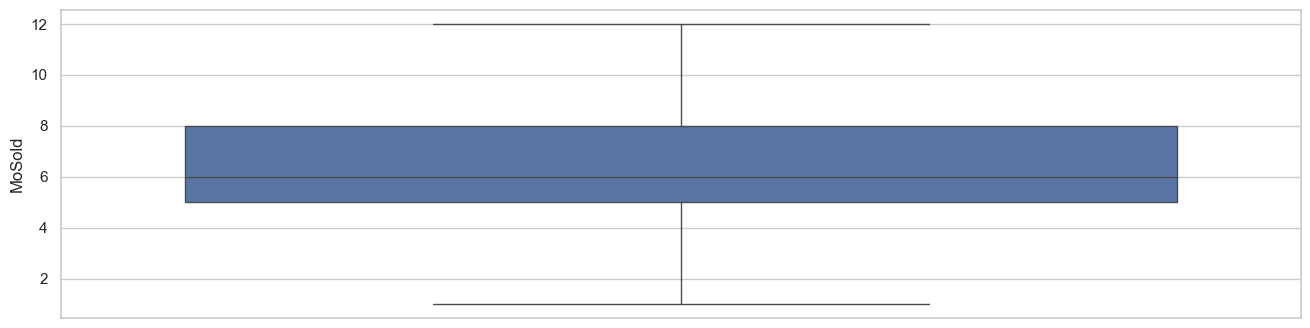

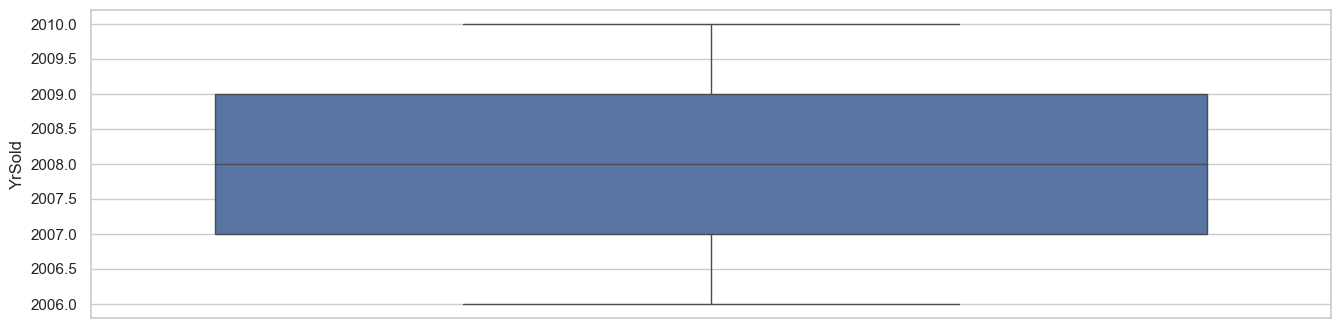

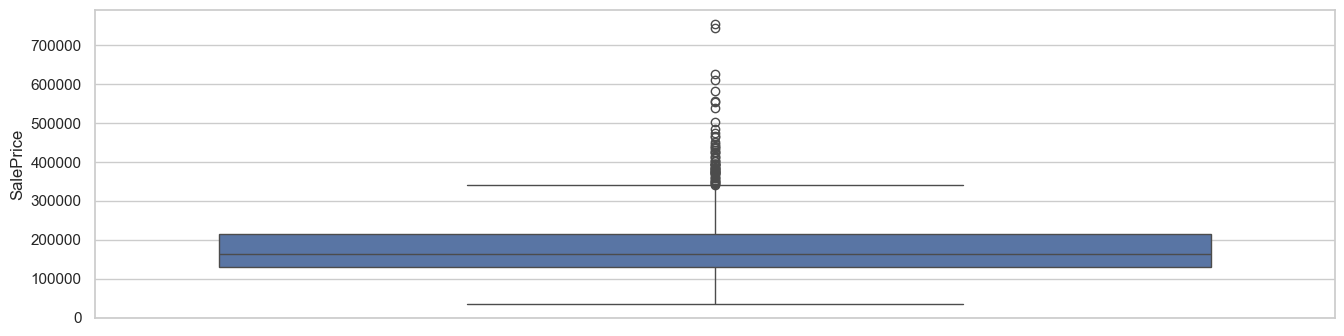

In [46]:
# find outliers for all the numerical dataset (before handling missing values)

numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)

for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

In [47]:
#features present in train data that are not present in test data
feature_train_not_test = [col for col in df_train.columns if col not in df_test.columns and col != 'SalePrice']

print(feature_train_not_test)

#features present in test data that are not present in train data

feature_test_not_train = [col for col in df_test.columns if col not in df_train.columns]

print(feature_test_not_train)

[]
[]


In [65]:
#combine train and test data for data preprocessing

df_merge=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])

df_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


## Handle categorical and numerical missing values

In [66]:
#Function to get count of missing values in each column

def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]
print(get_cols_with_missing_values(df_merge))

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [67]:
#Get a list of all the categorical features that have the keyword 'Qual' OR 'Cond' OR 'Qu' OR 'QC' in the feature name
feature_rating_Qual = [col for col in df_merge.columns if 'Qual' in col and df_merge[col].dtypes=='object']
feature_rating_Cond = [col for col in df_merge.columns if 'Cond' in col and col not in ['Condition1', 'Condition2', 'SaleCondition'] and df_merge[col].dtypes=='object']
feature_rating_Qu = [col for col in df_merge.columns if 'Qu' in col and df_merge[col].dtypes=='object' and col not in feature_rating_Qual]
feature_rating_QC = [col for col in df_merge.columns if 'QC' in col and df_merge[col].dtypes=='object']

cat_feature_with_rating = feature_rating_Qual + feature_rating_Cond + feature_rating_Qu + feature_rating_QC
for x in cat_feature_with_rating:
    print(x)

ExterQual
BsmtQual
KitchenQual
GarageQual
ExterCond
BsmtCond
GarageCond
FireplaceQu
HeatingQC
PoolQC


In [68]:
#Categorical features who have NA as a correct value

cat_feature_with_legit_na = ['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature']
df_merge[cat_feature_with_legit_na].head()

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,NaN,No,Rec,LwQ,Attchd,Unf,MnPrv,NaN
1,NaN,No,ALQ,Unf,Attchd,Unf,NaN,Gar2
2,NaN,No,GLQ,Unf,Attchd,Fin,MnPrv,NaN
3,NaN,No,GLQ,Unf,Attchd,Fin,NaN,NaN
4,NaN,No,ALQ,Unf,Attchd,RFn,NaN,NaN


In [75]:
ordinal_cat_features = cat_feature_with_rating + cat_feature_with_legit_na
df_merge[ordinal_cat_features].head()


,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,TA,TA,TA,TA,TA,TA,TA,Missing,TA,Missing,Missing,No,Rec,LwQ,Attchd,Unf,MnPrv,Missing
1,TA,TA,Gd,TA,TA,TA,TA,Missing,TA,Missing,Missing,No,ALQ,Unf,Attchd,Unf,Missing,Gar2
2,TA,Gd,TA,TA,TA,TA,TA,TA,Gd,Missing,Missing,No,GLQ,Unf,Attchd,Fin,MnPrv,Missing
3,TA,TA,Gd,TA,TA,TA,TA,Gd,Ex,Missing,Missing,No,GLQ,Unf,Attchd,Fin,Missing,Missing
4,Gd,Gd,Gd,TA,TA,TA,TA,Missing,Ex,Missing,Missing,No,ALQ,Unf,Attchd,RFn,Missing,Missing


In [76]:
#On checking the data description, Missing is valid in some categorical

#Handling Missing Values in Ordinal Categorical features by replacing them with 'Missing' keyword

df_merge[ordinal_cat_features] = df_merge[ordinal_cat_features].fillna("Missing")
#Making sure the missing values have been handled
print(get_cols_with_missing_values(df_merge[ordinal_cat_features]))

Series([], dtype: int64)


In [77]:
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object' and cname!='ind']
remaining_cat_cols = [cname for cname in categorical_cols if cname not in ordinal_cat_features]
#Handling Missing Values in Categorical features by replacing them with the feature mode value
for col in remaining_cat_cols:
     df_merge[col] = df_merge[col].fillna(df_merge[col].mode()[0])

In [78]:
#Handling Missing Values in Numerical features by replacing them with Mean value
df_merge[numerical_cols]=df_merge[numerical_cols].fillna(df_merge[numerical_cols].mean())

In [79]:
#Select categorical columns with low cardinality
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object' and df_merge[cname].nunique()<10]
numerical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes!='object']

# Keep selected columns only
my_cols = numerical_cols + categorical_cols

df_merge_clean = df_merge[my_cols].copy()

In [80]:
#Drop 'Id' feature
df_merge_clean.drop('Id', axis=1, inplace=True)

In [81]:
df_merge_clean['GarageYrBlt'] = df_merge_clean['GarageYrBlt'].astype('int')
df_merge_clean['GarageYrBlt'] = df_merge_clean['YrSold'] - df_merge_clean['GarageYrBlt']
df_merge_clean['YearBuilt'] = df_merge_clean['YrSold'] - df_merge_clean['YearBuilt']
df_merge_clean['YearRemodAdd'] = df_merge_clean['YrSold'] - df_merge_clean['YearRemodAdd']
df_merge_clean.drop(["YrSold"], axis=1, inplace=True)
df_merge_clean.drop(["MoSold"], axis=1, inplace=True)

In [82]:
#TotalBsmtSF(Total square feet of basement area) = BsmtFinSF1(Type 1 finished square feet) + BsmtFinSF2(Type 2 finished square feet) + BsmtUnfSF(Unfinished square feet of basement area)
df_merge_clean.drop(["TotalBsmtSF"], axis=1, inplace=True)
#Basement finished area
df_merge_clean['BsmtFinSF'] = df_merge_clean['BsmtFinSF1'] + df_merge_clean['BsmtFinSF2']
df_merge_clean.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtFinSF2"], axis=1, inplace=True)
#Total floor square feet
df_merge_clean['TotalFlrSF'] = df_merge_clean['1stFlrSF'] + df_merge_clean['2ndFlrSF']

df_merge_clean.drop(["1stFlrSF"], axis=1, inplace=True)
df_merge_clean.drop(["2ndFlrSF"], axis=1, inplace=True)

In [83]:
df_merge_clean['Total_Bath'] = (df_merge_clean['FullBath'] 
        + (0.5*df_merge_clean['HalfBath']) 
        + df_merge_clean['BsmtFullBath'] 
        + (0.5*df_merge_clean['BsmtHalfBath']))

df_merge_clean.drop(["FullBath"], axis=1, inplace=True)
df_merge_clean.drop(["HalfBath"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtFullBath"], axis=1, inplace=True)
df_merge_clean.drop(["BsmtHalfBath"], axis=1, inplace=True)

In [84]:
numerical_cols = [cname for cname in df_merge_clean.columns if df_merge_clean[cname].dtypes!='object' and cname!='SalePrice']
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_merge_clean[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,MSSubClass,1.375457,1.375457,True
1,LotFrontage,1.645574,1.645574,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,YearBuilt,0.598609,0.598609,True
6,YearRemodAdd,0.450226,0.450226,False
7,MasVnrArea,2.611549,2.611549,True
8,BsmtUnfSF,0.919508,0.919508,True
9,LowQualFinSF,12.088761,12.088761,True


In [85]:
df_merge_clean[numerical_cols].describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BsmtFinSF,TotalFlrSF,Total_Bath
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,36.479959,23.528263,102.201312,560.772104,4.694416,1500.759849,2.860226,1.044536,6.451524,0.597122,29.685509,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,491.005483,1496.065433,2.218712
std,42.517628,21.312345,7886.996359,1.409947,1.113131,30.336182,20.892061,178.626089,439.468337,46.396825,506.051045,0.822693,0.214462,1.569379,0.646129,24.908326,0.761494,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,477.123276,503.675790,0.808943
min,20.000000,21.000000,1300.000000,1.000000,1.000000,-1.000000,-2.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1.000000
25%,20.000000,60.000000,7478.000000,5.000000,5.000000,7.000000,4.000000,0.000000,220.000000,0.000000,1126.000000,2.000000,1.000000,5.000000,0.000000,7.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1120.000000,1.500000
50%,50.000000,69.305795,9453.000000,6.000000,5.000000,35.000000,15.000000,0.000000,467.000000,0.000000,1444.000000,3.000000,1.000000,6.000000,1.000000,29.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,458.000000,1440.000000,2.000000
75%,70.000000,78.000000,11570.000000,7.000000,6.000000,54.500000,43.000000,163.500000,805.000000,0.000000,1743.500000,3.000000,1.000000,7.000000,1.000000,46.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,805.500000,1742.500000,2.500000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,136.000000,60.000000,1600.000000,2336.000000,1064.000000,5642.000000,8.000000,3.000000,15.000000,4.000000,114.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,5644.000000,5642.000000,7.000000


In [86]:
#Apply log1p transformation
for column in skew_df.query("Skewed == True")['Feature'].values:
    df_merge_clean[column] = np.log1p(df_merge_clean[column])

In [87]:
#Before encoding - features with rating
df_merge_clean[cat_feature_with_rating]

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,TA,TA,TA,TA,TA,TA,TA,Missing,TA,Missing
1,TA,TA,Gd,TA,TA,TA,TA,Missing,TA,Missing
2,TA,Gd,TA,TA,TA,TA,TA,TA,Gd,Missing
3,TA,TA,Gd,TA,TA,TA,TA,Gd,Ex,Missing
4,Gd,Gd,Gd,TA,TA,TA,TA,Missing,Ex,Missing
...,...,...,...,...,...,...,...,...,...,...
1455,TA,Gd,TA,TA,TA,TA,TA,TA,Ex,Missing
1456,TA,Gd,TA,TA,TA,TA,TA,TA,TA,Missing
1457,Ex,TA,Gd,TA,Gd,Gd,TA,Gd,Ex,Missing
1458,TA,TA,Gd,TA,TA,TA,TA,Missing,Gd,Missing


In [88]:
for col in cat_feature_with_rating:
    if 'Missing' in df_merge_clean[col].value_counts().index:
        df_merge_clean[col] = df_merge_clean[col].map({"Missing":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})
    else:
        df_merge_clean[col] = df_merge_clean[col].map({"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5})

In [89]:
#After encoding - features with rating
df_merge_clean[cat_feature_with_rating]

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,3,3,3,3,3,3,3,0,3,0
1,3,3,4,3,3,3,3,0,3,0
2,3,4,3,3,3,3,3,3,4,0
3,3,3,4,3,3,3,3,4,5,0
4,4,4,4,3,3,3,3,0,5,0
...,...,...,...,...,...,...,...,...,...,...
1455,3,4,3,3,3,3,3,3,5,0
1456,3,4,3,3,3,3,3,3,3,0
1457,5,3,4,3,4,4,3,4,5,0
1458,3,3,4,3,3,3,3,0,4,0


In [90]:
#features with legit na
df_merge_clean[cat_feature_with_legit_na]

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Missing,No,Rec,LwQ,Attchd,Unf,MnPrv,Missing
1,Missing,No,ALQ,Unf,Attchd,Unf,Missing,Gar2
2,Missing,No,GLQ,Unf,Attchd,Fin,MnPrv,Missing
3,Missing,No,GLQ,Unf,Attchd,Fin,Missing,Missing
4,Missing,No,ALQ,Unf,Attchd,RFn,Missing,Missing
...,...,...,...,...,...,...,...,...
1455,Missing,No,Unf,Unf,Attchd,RFn,Missing,Missing
1456,Missing,No,ALQ,Rec,Attchd,Unf,MnPrv,Missing
1457,Missing,No,GLQ,Unf,Attchd,RFn,GdPrv,Shed
1458,Missing,Mn,GLQ,Rec,Attchd,Unf,Missing,Missing


In [91]:
#Exclude 'Alley', MiscFeature' and 'GarageType' feature as they are not ordinal
df_merge_clean['BsmtExposure'] = df_merge_clean['BsmtExposure'].map({"Missing":0,"No":1,"Mn":2,"Av":3,"Gd":4}).astype('int')
df_merge_clean['BsmtFinType1'] = df_merge_clean['BsmtFinType1'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_merge_clean['BsmtFinType2'] = df_merge_clean['BsmtFinType2'].map({"Missing":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}).astype('int')
df_merge_clean['GarageFinish'] = df_merge_clean['GarageFinish'].map({"Missing":0,"Unf":1,"RFn":2,"Fin":3}).astype('int')
df_merge_clean['Fence'] = df_merge_clean['Fence'].map({"Missing":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}).astype('int')

In [92]:
df_merge_clean['LotShape'] = df_merge_clean['LotShape'].map({"IR3":1,"IR2":2,"IR1":3,"Reg":4}).astype('int')
df_merge_clean['LandContour'] = df_merge_clean['LandContour'].map({"Low":1,"Bnk":2,"HLS":3,"Lvl":4}).astype('int')
df_merge_clean['Utilities'] = df_merge_clean['Utilities'].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}).astype('int')
df_merge_clean['LandSlope'] = df_merge_clean['LandSlope'].map({"Sev":1,"Mod":2,"Gtl":3}).astype('int')
df_merge_clean['CentralAir'] = df_merge_clean['CentralAir'].map({"N":0,"Y":1}).astype('int')
df_merge_clean['PavedDrive'] = df_merge_clean['PavedDrive'].map({"N":0,"P":1,"Y":2}).astype('int')

In [93]:
cat_remaining_to_encode = [col for col in df_merge_clean.columns if df_merge_clean[col].dtypes=='object' and col !='ind']
print(cat_remaining_to_encode)

['MSZoning', 'Street', 'Alley', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [94]:
df_merge_clean_dummies = pd.get_dummies(df_merge_clean[cat_remaining_to_encode],drop_first=True)
df_merge_clean.drop(cat_remaining_to_encode,axis=1,inplace=True)
df_merge_clean = pd.concat([df_merge_clean,df_merge_clean_dummies],axis=1)

In [95]:
test, train= df_merge_clean[df_merge_clean["ind"].eq("test")], df_merge_clean[df_merge_clean["ind"].eq("train")]
test.drop(["SalePrice", "ind"], axis=1, inplace=True)

train.drop(["ind"], axis=1, inplace=True)

In [96]:
log_target = np.log(train['SalePrice'])

train.drop(["SalePrice"], axis=1, inplace=True)

In [102]:
catboost_params = {
    'iterations': 5000,
    'learning_rate': 0.02,
    'depth': 4,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 20
}

xgboost_params = {
    'n_estimators': 5000,
    'learning_rate': 0.02,
    'colsample_bytree': 0.5,
    'subsample': 0.5,
    'min_child_weight': 2,
    #'early_stopping_rounds': 20，
    "early_stopping_rounds": None
}

In [103]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "xgb": XGBRegressor(**xgboost_params, verbose=0)
}

In [104]:
for name, model in models.items():
    model.fit(train, log_target)
    print(name + " trained.")

catboost trained.
xgb trained.


In [105]:
results = {}
kf = KFold(n_splits=10)
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [ ]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

In [ ]:
#Combine predictions
final_predictions = (
    0.5 * np.exp(models['catboost'].predict(test)) +
    0.5 * np.exp(models['xgb'].predict(test))
)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': test.index+1461,
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)